In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

#treeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Randomforrest
from sklearn.ensemble import RandomForestClassifier

#Import for GridSearch
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer 

#Import adaboostedtree
from sklearn.ensemble import AdaBoostClassifier

#Import logistic regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [4]:
#df_test = pd.read_csv('aug_test.csv')
df_train = pd.read_csv('aug_train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
#Only do this for numbers

#should we do something different here? Experience=Experience in years
    
def experienceN(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1 
    if x=='2'       :   return 2 
    if x=='3'       :   return 3 
    if x=='4'       :   return 4 
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8 
    if x=='9'       :   return 9 
    if x=='10'      :   return 10 
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13 
    if x=='14'      :   return 1
    if x=='19'      :   return 19 
    if x=='20'      :   return 20 
    if x=='>20'     :   return 21 
    
def companySizeN(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1 
    if x=='100-500'      :   return 2 
    if x=='1000-4999'    :   return 3 
    if x=='10000+'       :   return 4 
    if x=='50-99'        :   return 5 
    if x=='500-999'      :   return 6 
    if x=='5000-9999'    :   return 7
    
#We set a boundary on >4 = 1 and <4 = 0
def lastNewJobN(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 0
    if x=='2'            :   return 0
    if x=='3'            :   return 0
    if x=='4'            :   return 1
    if x=='>4'           :   return 1

In [6]:
df_train['experience'] = df_train['experience'].apply(experienceN)
df_train['company_size'] = df_train['company_size'].apply(companySizeN)
df_train['last_new_job'] = df_train['last_new_job'].apply(lastNewJobN)

In [7]:
df_train = df_train.fillna(df_train.mean(numeric_only=True))
df_train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                   0
company_size                 0
company_type              6140
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [8]:
df_train['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [9]:
df_train['gender'] = df_train['gender'].fillna('Male', limit = 4057)
df_train['gender'] = df_train['gender'].fillna('Female', limit = 383)
df_train['gender'] = df_train['gender'].fillna('Other')

In [10]:
df_train['enrolled_university'].fillna(value = 'no_enrollment', inplace = True)

In [11]:
df_train['education_level'].fillna(value = 'Graduate', inplace = True)

In [12]:
df_train['major_discipline'].fillna(value = 'STEM', inplace = True)

In [13]:
df_train['company_type'].fillna(value = 'Pvt Ltd', inplace = True)
df_train.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [14]:
df_train = df_train.drop(['target', 'enrollee_id', 'training_hours'], axis = 1)

In [15]:
df_train['last_new_job'] = df_train['last_new_job'].astype(int)

In [16]:
df_train = pd.get_dummies(df_train)
Y = df_train['last_new_job']
X = df_train.drop(columns=['last_new_job'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Decision tree classifier

In [18]:
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15326 entries, 13330 to 15795
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               15326 non-null  object 
 1   relevent_experience  15326 non-null  object 
 2   enrolled_university  15326 non-null  object 
 3   education_level      15326 non-null  object 
 4   major_discipline     15326 non-null  object 
 5   experience           15326 non-null  float64
 6   company_size         15326 non-null  float64
 7   company_type         15326 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.1+ MB


gender      relevent_experience enrolled_university education_level  \
13330   Male   No relevent experience       no_enrollment     High School   
18074   Male  Has relevent experience       no_enrollment         Masters   
366     Male   No relevent experience       no_enrollment        Graduate   
10662   Male   No relevent experience       no_enrollment     High School   
13974   Male  Has relevent experience    Full time course        Graduate   

      major_discipline  experience  company_size company_type  
13330             STEM         2.0       3.27466      Pvt Ltd  
18074             STEM         6.0       3.00000      Pvt Ltd  
366               STEM         3.0       3.27466      Pvt Ltd  
10662             STEM         3.0       3.27466      Pvt Ltd  
13974             STEM         4.0       3.27466      Pvt Ltd

In [17]:
dtree = tree.DecisionTreeClassifier() 
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [31]:
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, Y_train)))

Accuracy on training set: 0.923


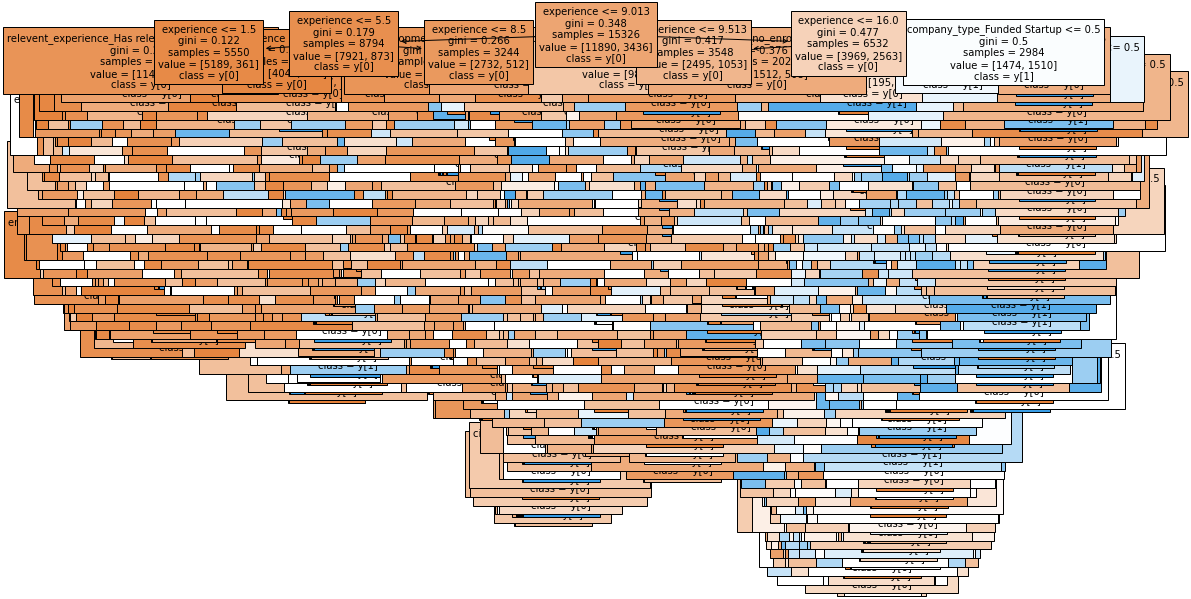

In [30]:
plt.figure(figsize=(17,10))  # set plot size (denoted in inches)
tree.plot_tree(dtree,
               class_names=True,
               feature_names=list(X_train.columns), # label features with the column names from X
               filled=True, # color nodes to indicate majority class
               fontsize=10) 
plt.savefig('big_tree.png', bbox_inches='tight') # save plot as png file 

In [34]:
param_grid={'criterion': ['gini'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 17],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 11]},

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring = 'accuracy', cv=5, verbose = 5)
grid.fit(X_train, Y_train)

# print the best score obtained
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

#print the parameters that acheived the best score
print("Best parameters: ", grid.best_params_)
        

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.783 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.778 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.782 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.779 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.790 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=6;, score=0.783 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=6;, score=0.778 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=6;, score=0.782 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=6;, score=0.779 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=6;, score=0.790 total time=   0.0

[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=5;, score=0.784 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=5;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=5;, score=0.789 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=6;, score=0.787 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=6;, score=0.783 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=6;, score=0.784 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=6;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=6;, score=0.790 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=7;, score=0.787 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=7;, score=0.783 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=7

[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=6;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=6;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=6;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=7;, score=0.772 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=7;, score=0.782 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=7;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=7;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=7;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=8;, score=0.772 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=8;, score=0.784 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=8

Random forrest

In [33]:
rtree = RandomForestClassifier() 
rtree.fit(X_train, Y_train)

RandomForestClassifier()

In [34]:
print("Accuracy on training set: {:.3f}".format(rtree.score(X_train, Y_train)))

Accuracy on training set: 0.923


In [22]:
param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 6, 8, 10, 17],
                         'min_samples_leaf': [5, 7, 9, 11]},

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring = 'accuracy', cv=5, verbose = 5)
grid.fit(X_train, Y_train)

# print the best score obtained
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

#print the parameters that acheived the best score
print("Best parameters: ", grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.776 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.776 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.776 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.776 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.776 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=7;, score=0.776 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=7;, score=0.776 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=7;, score=0.776 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=7;, score=0.776 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=7;, score=0.776 total time=   0.3

[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=7;, score=0.776 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=7;, score=0.776 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=7;, score=0.776 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=9;, score=0.776 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=9;, score=0.776 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=9;, score=0.776 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=9;, score=0.776 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=9;, score=0.776 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=11;, score=0.776 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=11;, score=0.776 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=10, min_s

[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=9;, score=0.776 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=9;, score=0.776 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=9;, score=0.776 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=11;, score=0.776 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=11;, score=0.776 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=11;, score=0.776 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=11;, score=0.776 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=11;, score=0.776 total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=5;, score=0.776 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=5;, score=0.776 total time=   0.5s
[CV 3/5] END criterion=en

In [35]:
y_pred=rtree.predict(X_test)

In [36]:
#print('Accuracy: ', sum(Y_test==y_pred)/len(Y_test)) # by hand

from sklearn import metrics # by using metrics library
print('Accuracy of test set: ',metrics.accuracy_score(Y_test,y_pred))

Accuracy:  0.7562630480167014


Prunet random forrest

In [27]:
ptree = RandomForestClassifier(max_depth=17, min_samples_leaf=5) 
ptree.fit(X_train, Y_train)

RandomForestClassifier(max_depth=17, min_samples_leaf=5)

In [37]:
print("Accuracy on training set: {:.3f}".format(ptree.score(X_train, Y_train)))

Accuracy on training set: 0.783


In [28]:
y_pred=ptree.predict(X_test)

In [29]:
#print('Accuracy: ', sum(Y_test==y_pred)/len(Y_test)) # by hand

from sklearn import metrics # by using metrics library
print('Accuracy of terst set: ',metrics.accuracy_score(Y_test,y_pred))

Accuracy:  0.7708768267223383


Results: Random forrwst alone without tuning/pruning, overfits the data(0.923). Using grid-search for tuning/pruning the forrest, we have a less overfitted tree having accuricy on triaining data being 0.78, and accuracy on our test data being 0.77. This result is very good, since having train and test accuracy being similar numbers means that the tree is no longer overfitting. 

Adaboosted tree

In [18]:
atree = AdaBoostClassifier()
atree.fit(X_train, Y_train)

AdaBoostClassifier()

In [19]:
print("Accuracy on training set: {:.3f}".format(atree.score(X_train, Y_train)))

Accuracy on training set: 0.785


In [20]:
y_pred=atree.predict(X_test)

In [29]:
#print('Accuracy: ', sum(Y_test==y_pred)/len(Y_test)) # by hand

from sklearn import metrics # by using metrics library
print('Accuracy of test set: ',metrics.accuracy_score(Y_test,y_pred))

Accuracy of test set:  0.7823590814196242


Logistic regression

In [28]:
logr = LogisticRegression()
logr.fit(X_train,Y_train)

#print train score
print("Score of training set: {:.3f}".format(logr.score(X_train, Y_train)))

#Print test score
y_pred=logr.predict(X_test)
print('Accuracy of test set: ',metrics.accuracy_score(Y_test,y_pred))

#print coefficient
coefficient = logr.coef_
print(coefficient)

Score of training set: 0.786
Accuracy of test set:  0.7823590814196242
[[ 0.33318173  0.11161094  0.01299747  0.0301925   0.45604812 -0.01366659
  -0.11230222 -0.22889539  0.19786414  0.21178047  0.17804966 -0.07488067
   0.03099738 -0.13081208 -0.6175664   0.08155703  0.23447481  0.09399238
   0.0678785  -0.04127586 -0.03716527 -0.0252835   0.08203121 -0.02974923
  -0.13679691 -0.00853457  0.0596529  -0.38837193  0.08126496  0.0034605
  -0.07136044 -0.0787831  -0.19844915  0.11595541 -0.67595011 -0.09074984
  -0.24091433  0.         -0.16999483  0.077592   -0.44256798  0.29350059
  -0.30115432  0.10866357 -0.11109012  0.24343526 -0.05218734 -0.23066175
  -0.09110079 -0.00914165  0.70392589  0.04958974  0.12066466 -0.39821744
  -0.24803195 -0.05800789 -0.07753132 -0.00894599 -0.14777552  0.07156118
   0.01996056  0.0087377   0.04704883  0.03941119 -0.79972728  0.12133883
  -0.23250306 -0.08064603  0.17966216 -0.05297239  0.07600835 -0.28358756
  -0.09157869  0.92867632  0.16633719 -0.0

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Interpretation of coefficient: the change in the log-odds ratio for y per unit change in x; the change in log odds of a house having a "high" price for each.


In [24]:
odds = np.exp(coefficient)
odds

array([[1.39540086, 1.11807778, 1.0130823 , 1.03065292, 1.57782627,
        0.98642638, 0.8937741 , 0.79541173, 1.21879679, 1.23587655,
        1.19488465, 0.9278542 , 1.03148281, 0.87738263, 0.53925517,
        1.08497509, 1.26424462, 1.09855137, 1.07023527, 0.95956439,
        0.96351688, 0.97503345, 1.08548969, 0.97068893, 0.87214733,
        0.99150175, 1.06146805, 0.67816007, 1.08465825, 1.0034665 ,
        0.93112622, 0.92424037, 0.82000147, 1.12294579, 0.5086729 ,
        0.91324614, 0.78590896, 1.        , 0.84366918, 1.08068166,
        0.64238467, 1.34111397, 0.73996357, 1.11478724, 0.8948581 ,
        1.27562373, 0.94915103, 0.79400799, 0.91292569, 0.99090001,
        2.02167401, 1.05083989, 1.1282465 , 0.671516  , 0.78033501,
        0.94364251, 0.92539804, 0.9910939 , 0.86262474, 1.07418386,
        1.02016111, 1.00877598, 1.04817319, 1.04019811, 0.44945152,
        1.12900739, 0.79254733, 0.92252018, 1.19681297, 0.9484062 ,
        1.07897158, 0.75307718, 0.91248951, 2.53

So, the above tells us that, on average, for an increase of 1 for each x variable, the odds that the last new job will be 1 price is the above numbers â€” the odds only increase a tiny bit. (i.e. 1 would mean absolutely no effect).

(look at lecture 4, and exercises lecture 4 to understand logistic regression and coefficients)